In [17]:
models_location = ["MNIST_clear_transformer", "MNIST_gnn_cross_transformer", "MNIST_gnn_transformer"]
models = ["clear_transformer", "gnn_cross_transformer", "gnn_transformer"] #"fullconnected_GAT"

dataset_name = "MNIST"

n_tests = 5
epoch = 50

data = {}

for model_name, models_location in zip(models, models_location):
    tests = []
    for i in range(n_tests):
        train_loss = []
        test_loss = []
        train_acc = []
        test_acc = []
        with open(f"results/{models_location}_{i:02}/data.dat") as f:
            lines = f.readlines()
            for i, line in enumerate(lines):
                if i>= epoch: break
                line = line.split(";")
                line = [float(x) for x in line]
                train_loss.append(line[0])
                train_acc.append(line[1])
                test_loss.append(line[2])
                test_acc.append(line[3])
        tests.append((train_loss,train_acc,test_loss,test_acc))
    
    data[model_name] = tests


In [18]:
import numpy as np
data_mean = {}
for model in models:
    data[model] = np.array(data[model])
    data_mean[model] = np.mean(data[model],axis=0)
    

C:\Users\baros\AppData\Local\Temp\ipykernel_12084\3109495861.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


Text(0.5, 1.0, 'MNIST loss')

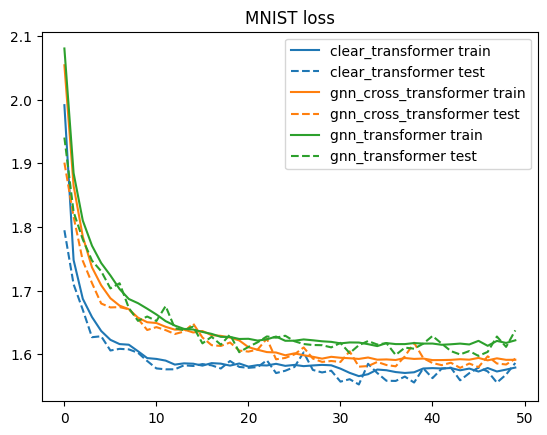

In [19]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.get_cmap('tab10', 10)


for i, model in enumerate(models):
    color = colors(i)
    plt.plot(data_mean[model][0], label=f"{model} train", color=color)
    plt.plot(data_mean[model][2], label=f"{model} test", color=color, linestyle='dashed')
plt.legend()
plt.title(f"{dataset_name} loss")
# xformers


C:\Users\baros\AppData\Local\Temp\ipykernel_12084\577889840.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', 10)


Text(0.5, 1.0, 'MNIST accuary')

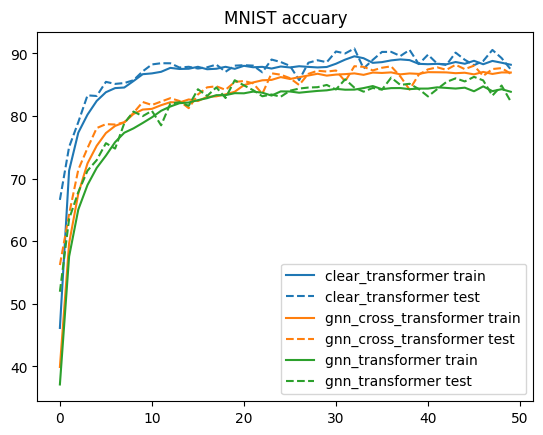

In [20]:
import matplotlib.pyplot as plt
import numpy as np

colors = plt.cm.get_cmap('tab10', 10)


for i, model in enumerate(models):
    color = colors(i)
    plt.plot(data_mean[model][1], label=f"{model} train", color=color)
    plt.plot(data_mean[model][3], label=f"{model} test", color=color, linestyle='dashed')
plt.legend()
plt.title(f"{dataset_name} accuary")
# xformers
